# **Neural network classificaton with tensorflow**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles
import tensorflow as tf
import matplotlib.pyplot as plt

2024-07-18 15:13:34.994921: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-18 15:13:35.179913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 15:13:35.266624: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 15:13:35.267415: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-18 15:13:35.407537: I tensorflow/core/platform/cpu_feature_gua

## **Create artificial dataset**

In [2]:
n_samples = 1000

In [3]:
X, y = make_circles(
    n_samples = n_samples,
    noise = 0.03,
    random_state = 42
)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], "label": y})

In [7]:

circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


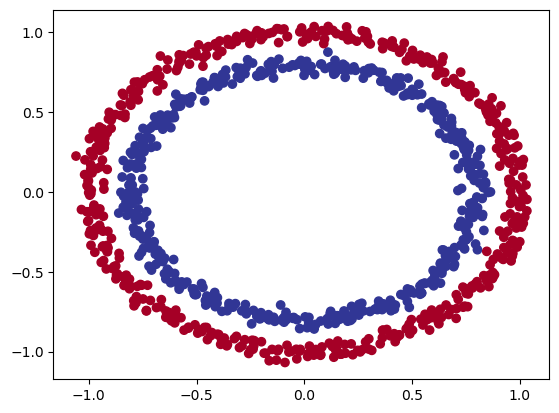

In [8]:
plt.scatter(x = circles.iloc[:, 0], y = circles.iloc[:, 1], c = circles.iloc[:, 2], cmap = 'RdYlBu');

## **Create initial model**

In [9]:
tf.keras.utils.set_random_seed(42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 1)
])

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)

model_1.fit(
    x = X,
    y = y,
    epochs = 200,
)

2024-07-18 15:13:37.547761: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-18 15:13:37.708099: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-18 15:13:37.708168: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-18 15:13:37.711199: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-18 15:13:37.711236: I external/local_xla/xla/stream_executor

Epoch 1/200


:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-18 15:13:38.168565: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1721308418.650458   99465 service.cc:145] XLA service 0x7fb5c0004bc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721308418.650537   99465 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-18 15:13:38.695158: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-18 15:13:38.771703: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4387 - loss: 5.2495 
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.5405 - loss: 4.9786
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.4906 - loss: 6.5521
Epoch 4/200
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5625 - loss: 5.6434

I0000 00:00:1721308418.942600   99465 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.5281 - loss: 6.1551
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.5182 - loss: 6.1637
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.5190 - loss: 6.1544
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.5125 - loss: 6.0204
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.4980 - loss: 6.0039
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.5028 - loss: 5.6614
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.4799 - loss: 4.2456
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.5135 - loss: 1.4064
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.5298 - loss: 0.7144
Epoch 13/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.5273 - loss: 0.6961
Epoch 14/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.5245 - loss: 0.6926
Epoch 15/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/s

In [10]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

## **Improve the model**

### **Add extra leayer**

In [11]:
tf.keras.utils.set_random_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)

model_2.fit(X, y, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4561 - loss: 7.1205
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.4246 - loss: 6.6184
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.5170 - loss: 7.6996
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [12]:
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 7.8989


[7.971191883087158, 0.5]

### **Add extra layer; Change the optimizer**

In [13]:
tf.keras.utils.set_random_seed(42)

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model_3.fit(
    x = X, 
    y = y,
    epochs = 100
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4589 - loss: 4.0498
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.4678 - loss: 1.2576
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.4830 - loss: 0.7323
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.4830 - loss: 0.7087
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.4830 - loss: 0.6989
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.4830 - loss: 0.6959
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.4376 - loss: 0.6951
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.4500 - loss: 0.6949
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.4427 - loss: 0.6949
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.4508 - loss: 0.6950
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.4497 - loss: 0.6951
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [14]:
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5159 - loss: 0.6915


[0.6955134868621826, 0.49399998784065247]

### **Create plotting function**

In [15]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        print('Multiclassification')
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print('Binary classification')
        y_pred = y_pred.round().reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Binary classification


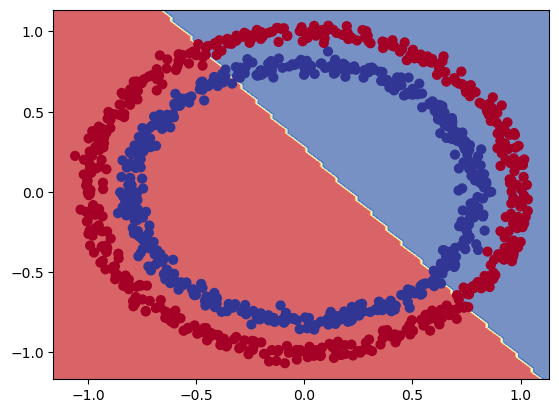

In [16]:
plot_decision_boundary(model_3, X, y)